In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

/tmp/ipykernel_1148491/1505154652.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read in the reports data 
df = pd.read_csv('../datasets/report_dataset_with_disease2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1719 non-null   int64  
 1   report_file     1719 non-null   object 
 2   body_part       1719 non-null   object 
 3   content         1719 non-null   object 
 4   conclusion      1719 non-null   object 
 5   disease_status  1719 non-null   int64  
 6   disease_type    1719 non-null   object 
 7   location        0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 107.6+ KB


In [3]:
nan_content_count = df['disease_type'].isna().sum()
print(f"Number of NaN values in the 'content' column: {nan_content_count}")

nan_rows = df[df['disease_type'].isna()]
print(nan_rows)

Number of NaN values in the 'content' column: 0
Empty DataFrame
Columns: [id, report_file, body_part, content, conclusion, disease_status, disease_type, location]
Index: []


In [4]:
# Get the size of each group
group_sizes = df.groupby('disease_type').size()

# Get the disease types that have less than 10 occurrences
small_groups = group_sizes[group_sizes < 10].index

# Filter out rows from df where disease_type is in small_groups
df = df[~df['disease_type'].isin(small_groups)]

In [5]:
df.head(5)

,id,report_file,body_part,content,conclusion,disease_status,disease_type,location
0,1,abodemen_3_posisi-2310200157_Series_1001-23102...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,tidak tampak kelainan radiologik.,0,normal,NaN
1,2,abodemen_3_posisi-2310220005_00001-report-1.txt,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kanan ...,1,proses infeksi,NaN
2,3,abodemen_3_posisi-2310220062_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kiri d...,1,proses infeksi,NaN
3,4,abodemen_3_posisi-2310230006_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,dilatasi ringan usus pada regio abdomen kanan ...,1,proses infeksi,NaN
5,6,abodemen_3_posisi-2310230083_Series_1001-repor...,abodemen_3_posisi,preperitoneal fat dan otot psoas line simetris...,tidak tampak kelainan radiologik.,0,normal,NaN


In [6]:
df.drop(columns=["id", "report_file", "body_part", "conclusion", "disease_status", "location"], inplace=True)
df.head(5)

,content,disease_type
0,preperitoneal fat dan otot psoas line simetris...,normal
1,preperitoneal fat dan otot psoas line simetris...,proses infeksi
2,preperitoneal fat dan otot psoas line simetris...,proses infeksi
3,preperitoneal fat dan otot psoas line simetris...,proses infeksi
5,preperitoneal fat dan otot psoas line simetris...,normal


In [7]:
print('* Size of dataframe: {}\n'.format(df.shape))
group_sizes = df.groupby('disease_type').size()
pd.set_option('display.max_rows', None) 
print(group_sizes)

* Size of dataframe: (1617, 2)

disease_type
bronkhopneumonia                         14
cardiomegaly                             51
degenerative disc                        14
efusi pleura                             23
fraktur                                 207
hernia nucleus pulposus                  25
ileus                                    13
internal fiksasi                         14
internal fiksasi, fraktur                52
knee arthroplasty                        22
normal                                  726
osteoarthritis                           67
pneumonia                               129
pneumonia atau tb paru                   19
proses infeksi                           29
scoliosis                                14
sinusitis                                11
spondyloarthritis                        13
spondylolisthesis                        17
straight cervical, spondyloarthritis     30
straight lumbal                          30
straight lumbal, spondyloarthri

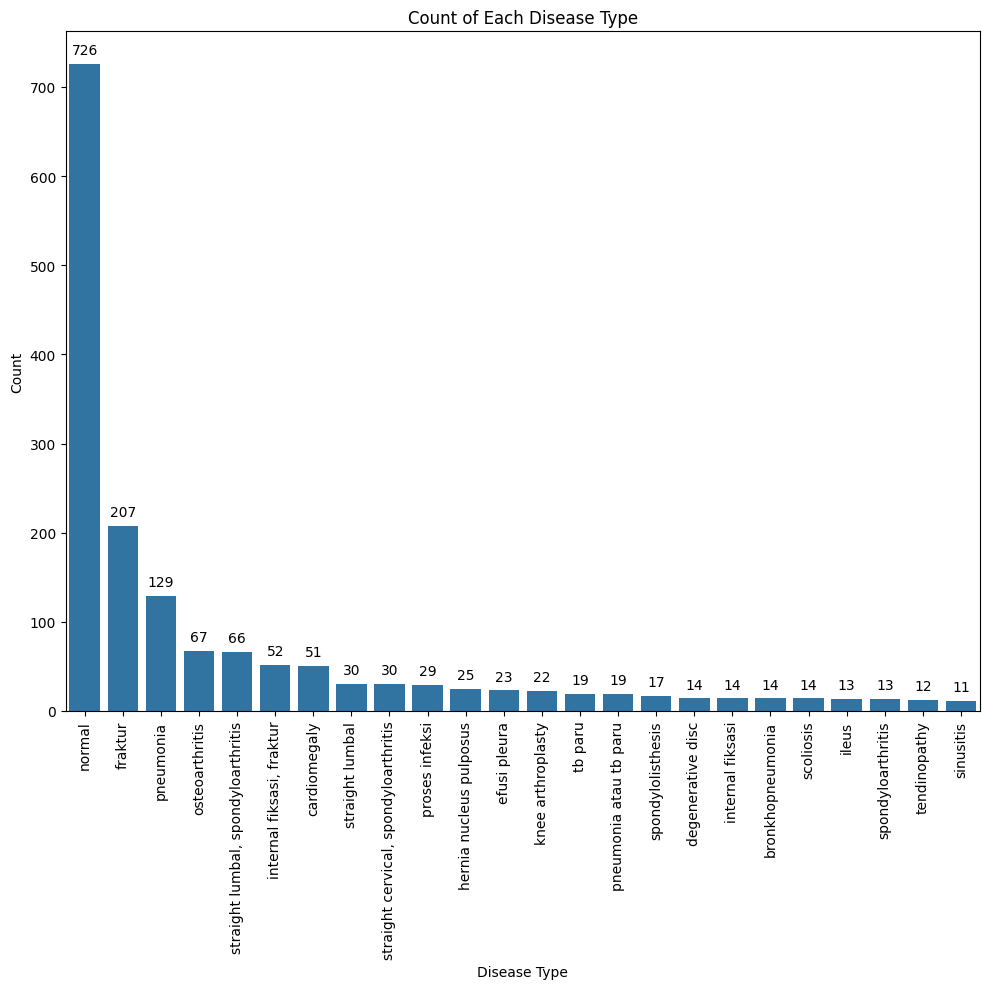

In [8]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='disease_type', data=df, order = df['disease_type'].value_counts().index)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.title('Count of Each Disease Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Assuming you want to downsample the 'normal' class
normal_data = df[df['disease_type'] == 'normal']
other_data = df[df['disease_type'] != 'normal']

# Downsample 'normal' data to a specified amount, for example 100
normal_downsampled = normal_data.sample(n=150, random_state=42)

# Combine downsampled 'normal' data with other data
df = pd.concat([other_data, normal_downsampled])

df.reset_index(drop=True, inplace=True)
df.head(5)

,content,disease_type
0,preperitoneal fat dan otot psoas line simetris...,proses infeksi
1,preperitoneal fat dan otot psoas line simetris...,proses infeksi
2,preperitoneal fat dan otot psoas line simetris...,proses infeksi
3,preperitoneal fat dan otot psoas line simetris...,proses infeksi
4,preperitoneal fat dan otot psoas line simetris...,proses infeksi


In [10]:
group_sizes = df.groupby('disease_type').size()
pd.set_option('display.max_rows', None) 
print(group_sizes)
print(f"Number of classes in body part: {df['disease_type'].nunique()}")

disease_type
bronkhopneumonia                         14
cardiomegaly                             51
degenerative disc                        14
efusi pleura                             23
fraktur                                 207
hernia nucleus pulposus                  25
ileus                                    13
internal fiksasi                         14
internal fiksasi, fraktur                52
knee arthroplasty                        22
normal                                  150
osteoarthritis                           67
pneumonia                               129
pneumonia atau tb paru                   19
proses infeksi                           29
scoliosis                                14
sinusitis                                11
spondyloarthritis                        13
spondylolisthesis                        17
straight cervical, spondyloarthritis     30
straight lumbal                          30
straight lumbal, spondyloarthritis       66
tb paru            

In [11]:
df['content'].sample(10)

644    kedudukan vertebra masih baik. kelengkungan be...
105    kedudukan tulang bahu berubah. acromion dan di...
24     preperitoneal fat dan otot psoas line simetris...
161    kedudukan tulang femur berubah. tampak diskont...
188    alignment genu baik. terpasang total knee arth...
711    kedudukan dan kelengkungan vertebra melurus. t...
784    kedudukan vertebra masih berubah tampak scolio...
972    kedudukan tulang pedis baik. struktur permukaa...
642    kedudukan vertebra masih baik. kelengkungan me...
980    kedudukan tulang radius-ulna tampak baik. tak ...
Name: content, dtype: object

In [12]:
import nltk
from nltk.corpus import stopwords
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from num2words import num2words
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def to_lowercase(words_list):
    new_words_list = []
    for word in words_list:
        new_words_list.append(word.lower())
    return new_words_list

def remove_punctuations(words_list):
    new_words_list = []
    for word in words_list:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words_list.append(new_word)
    return new_words_list

def remove_stopwords(words_list):
    new_words_list = []
    stop_words = stopwords.words("indonesian")
    
    for word in words_list:
        if word not in stop_words:
            new_words_list.append(word)
            
    return new_words_list

def stem_words(words_list):
    ps = PorterStemmer()
    return [ps.stem(word) for word in words_list]

    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()
    # return [stemmer.stem(word) for word in words_list]

def lemmatize_verbs(words_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words_list]

def replace_numbers(words_list):
    new_words_list = []
    for word in words_list:
        if word.isdigit():
            new_word = num2words(int(word), lang='id')
            new_words_list.append(new_word)
        else:
            new_words_list.append(word)
    return new_words_list

def remove_non_ascii(words_list):
    new_words_list = []
    for word in words_list:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words_list.append(new_word)
    return new_words_list

def text_normalization(words):
    words = to_lowercase(words)
    words = remove_punctuations(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    # words = stem_words(words)
    # words = lemmatize_verbs(words)
    words = remove_non_ascii(words)
    return words

In [13]:
def tokenisasi(text):
    return nltk.word_tokenize(text)

def text_cleaning(text):
    text = re.sub("\n", " ", str(text))
    text = ' '.join([x for x in text_normalization(text.split())])
    return text

def clean(text):
    text = re.sub("\n", " ", str(text))
    text = str(text).lower().split()

    text = remove_punctuations(text)
    text = ' '.join([x for x in text])
    
    return text

In [14]:
df['content'] = [clean(i) for i in df['content']]

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['disease_type'] = le.fit_transform(df['disease_type'])

In [16]:
df.sample(10)

,content,disease_type
254,kedudukan tulang genu baik struktur permukaan ...,11
259,kedudukan tulang genu baik struktur permukaan ...,11
867,tampak internal fiksasi terpasang baik pada di...,4
599,jantung kesan tidak membesar aorta dan mediast...,3
157,tampak internal fiksasi plate and screws tampa...,4
358,kedudukan tulang pelvis berubah tampak fraktur...,4
51,tampak internal fiksasi pada bagian atas tenga...,8
730,kedudukan vertebra baik tak tampak fraktur des...,5
607,jantung kesan membesar cardiothoracic ratio se...,1
520,jantung kesan tidak membesar aorta dan mediast...,3


In [17]:
from sklearn.model_selection import train_test_split

df_train_val, df_test = train_test_split(df, test_size = 0.2, stratify=df['disease_type'], random_state=42)  # 10% data as test set

# Splitting the train+val into train and val sets
df_train, df_val = train_test_split(df_train_val, test_size = 0.2, stratify=df_train_val['disease_type'], random_state=42)

In [18]:
print(f'train: {len(df_train)}')
print(f'val : {len(df_val)}')
print(f'test  : {len(df_test)}')

train: 665
val : 167
test  : 209


In [19]:
from transformers import BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification
import torch

max_len = max(df['content'].apply(lambda x: len(x.split())))

class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
        
        if bool(sentences):
            # BERT will consume 512 tokens MAX
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            max_length=max_len,
                                            padding = True)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.sentences)

In [20]:
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=24)
model =  AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=24)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
train_judul = df_train['content'].to_list()
train_labels = df_train['disease_type'].to_list()

val_judul = df_val['content'].to_list()
val_labels = df_val['disease_type'].to_list()

test_judul = df_test['content'].to_list()
test_labels = df_test['disease_type'].to_list()

In [22]:
train_dataset = DataLoader(train_judul, train_labels)
val_dataset = DataLoader(val_judul, val_labels)
test_dataset = DataLoader(test_judul, test_labels)

In [23]:
from sklearn.metrics import f1_score, accuracy_score
from transformers import Trainer, TrainingArguments
import accelerate

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1_weighted = f1_score(labels, preds, average='weighted')  
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1_weighted': f1_weighted
    }


training_args = TrainingArguments(
    "test_trainer", 
    num_train_epochs=50,    # total number of training epochs          
    evaluation_strategy="epoch",
    per_device_train_batch_size=64,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
)

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

2024-05-25 22:55:28.676692: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 22:55:28.694122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 22:55:29.035015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/radiology/miniconda3/envs/tf-env/lib/python3.10/site-packages/accelerate/accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfigurat

In [24]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted
1,No log,1.562829,0.694611,0.605730
2,No log,0.960587,0.772455,0.702104
3,No log,0.731508,0.802395,0.765772
4,No log,0.542846,0.862275,0.831672
5,No log,0.470508,0.880240,0.850253
6,No log,0.473896,0.886228,0.863351
7,No log,0.418630,0.892216,0.870307
8,No log,0.464206,0.898204,0.882982
9,No log,0.463121,0.880240,0.851184
10,No log,0.351574,0.898204,0.876726


Checkpoint destination directory test_trainer/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


TrainOutput(global_step=825, training_loss=0.12067342353589607, metrics={'train_runtime': 161.0518, 'train_samples_per_second': 309.683, 'train_steps_per_second': 5.123, 'total_flos': 2050821249120000.0, 'train_loss': 0.12067342353589607, 'epoch': 75.0})

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


y_test = df_test['disease_type']  # Assuming df_test is your test DataFrame

# Assuming 'trainer' is your trained model and 'test_dataset' is your dataset prepared for testing
y_pred_output = trainer.predict(test_dataset)
y_pred = y_pred_output.predictions.argmax(1)


print(classification_report(y_pred, y_test, target_names=le.classes_))

                                      precision    recall  f1-score   support

                    bronkhopneumonia       0.33      1.00      0.50         1
                        cardiomegaly       1.00      1.00      1.00        10
                   degenerative disc       0.67      1.00      0.80         2
                        efusi pleura       0.80      0.67      0.73         6
                             fraktur       1.00      0.98      0.99        43
             hernia nucleus pulposus       1.00      0.83      0.91         6
                               ileus       0.67      1.00      0.80         2
                    internal fiksasi       1.00      1.00      1.00         3
           internal fiksasi, fraktur       1.00      1.00      1.00        10
                   knee arthroplasty       1.00      1.00      1.00         4
                              normal       0.97      0.97      0.97        30
                      osteoarthritis       0.92      1.00      

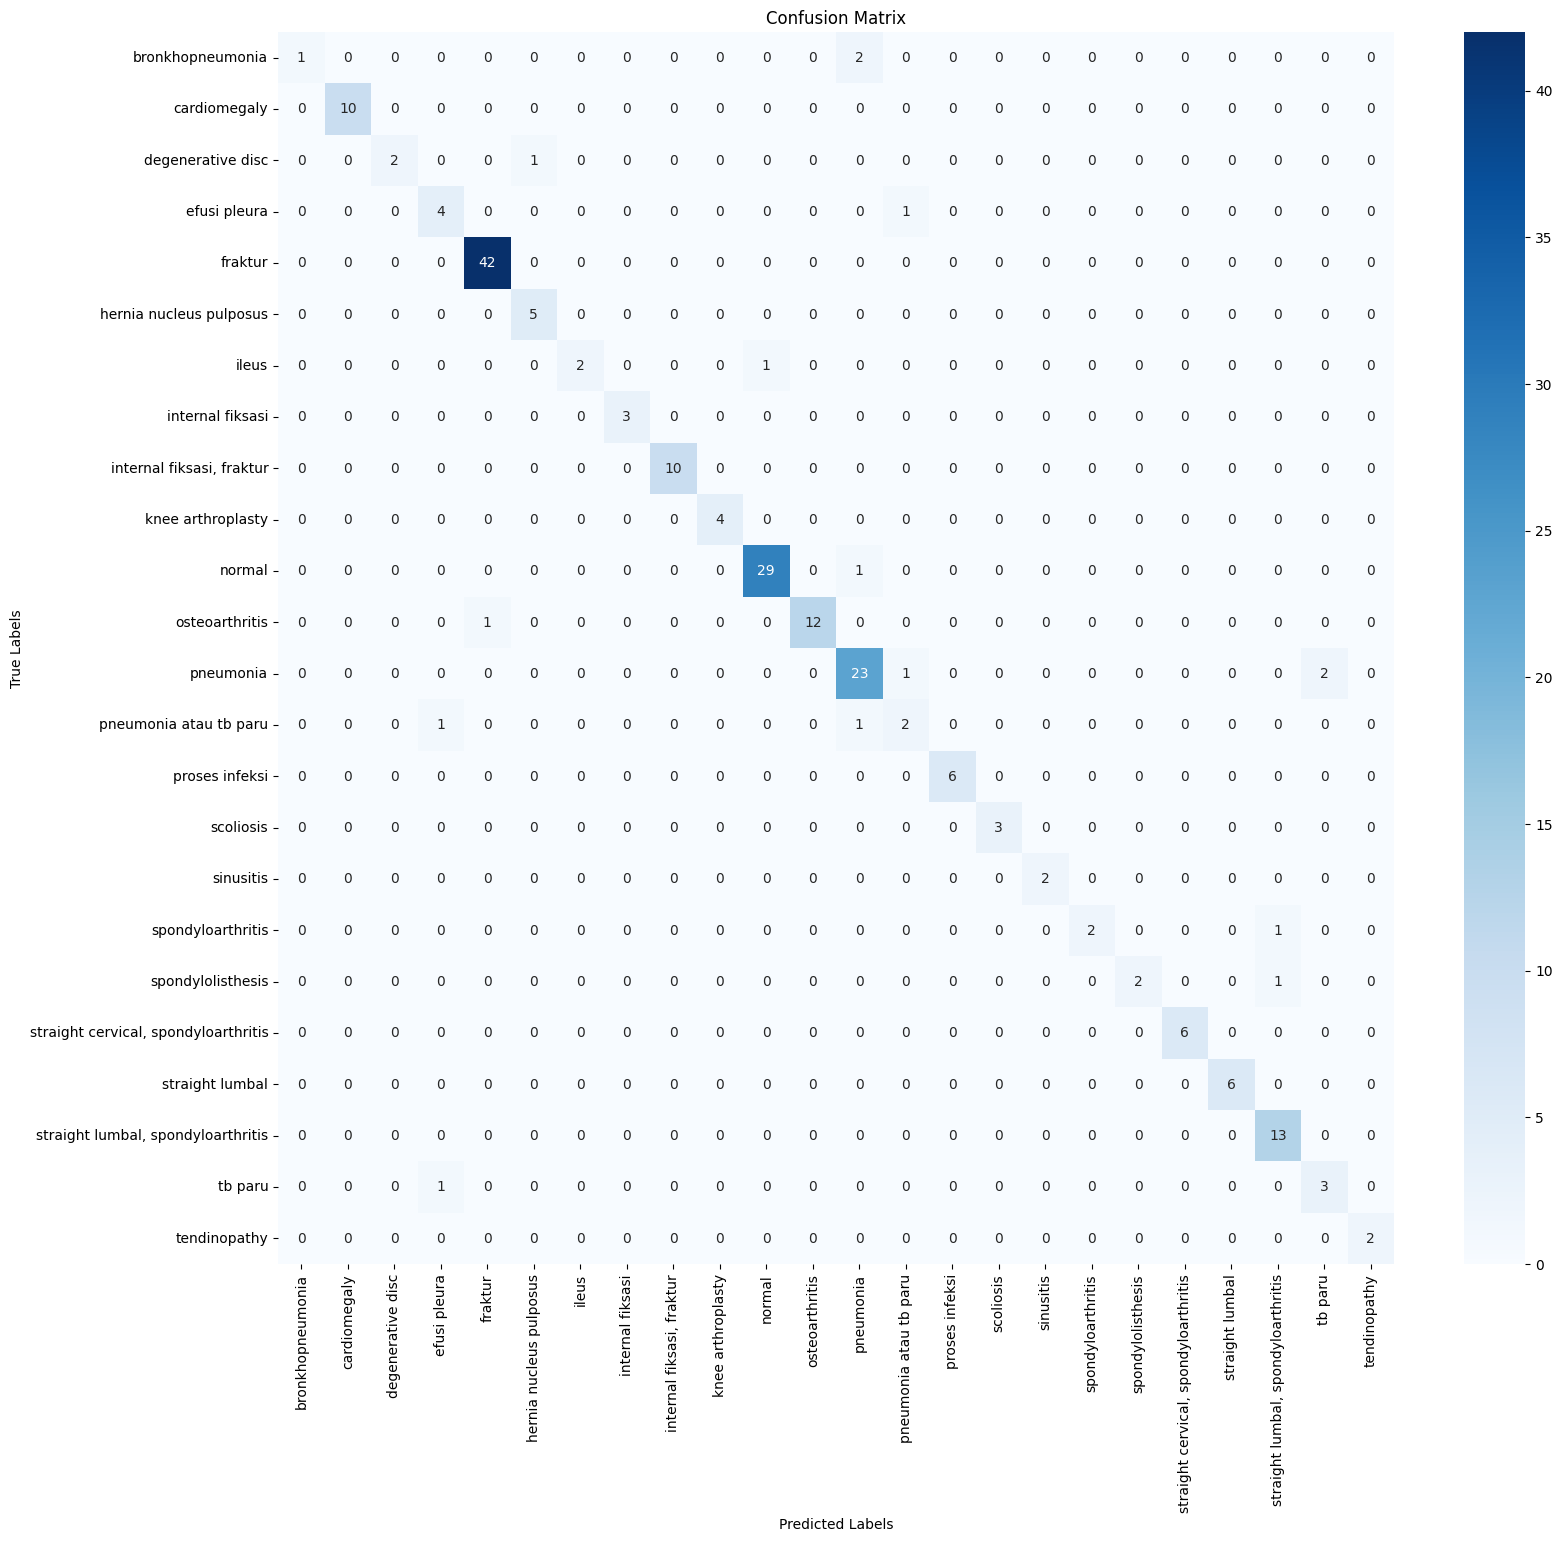

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(18, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print("The f1 score (weighted) is {}".format(f1_score(y_test, y_pred, average='weighted')))
print("The accuracy score is {}".format(accuracy_score(y_test, y_pred)))

The f1 score (weighted) is 0.9261810215727448
The accuracy score is 0.9282296650717703


In [28]:
print(df_test.iloc[0].to_dict())

{'content': 'kedudukan vertebra masih baik kelengkungan baik tak tampak fraktur destruksi bergeser maupun indikasi penyakit litik atau blastik lain diskus intervertebralis dalam batas normal', 'disease_type': 10}
